In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get update
!sudo apt-get install -y build-essential swig python3-dev python3-pip


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [973 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,591 kB]
Get:13 http://archive.ub

In [ ]:
!pip install rarfile --quiet
!pip install stable-baselines3 > /dev/null
!pip install box2d-py > /dev/null
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!sudo apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [ ]:
# install dependencies
!pip3 install gym --upgrade
!pip3 install pyglet
!pip3 install Box2D
!pip3 install box2d-py
!pip3 install gym[Box_2D]
!pip3 install gym[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 10.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827623 sha256=57fb89d57e036a3c060d28d8789d6823e568aa2d32cfab806621467f5e20c790
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.3/884.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import torch

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

The input state of the Lunar Lander consists of following components:

  1. Horizontal Position
  2. Vertical Position
  3. Horizontal Velocity
  4. Vertical Velocity
  5. Angle
  6. Angular Velocity
  7. Left Leg Contact
  8. Right Leg Contact

The actions of the agents are:
  1. Do Nothing
  2. Fire Main Engine
  3. Fire Left Engine
  4. Fire Right Engine

In [ ]:
!sudo apt-get update
!sudo apt-get install xvfb


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfon

# DQN

In [ ]:
import gym
import io
import os
import glob
import torch
import base64
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.callbacks import EvalCallback
from gym.wrappers import RecordVideo
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import random
from collections import namedtuple, deque
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Set up virtual display
display = Display(visible=0, size=(1400, 900))
display.start()

# Utility function to enable video recording of gym environment and displaying it
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

# Experience Replay class
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

class ExperienceReplay():
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def store_trans(self, s, a, sp, r, done):
        transition = Transition(s, a, sp, r, done)
        self.memory.append(transition)

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Deep Q-Network class
class DeepQNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(DeepQNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(state_size, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, action_size)
        )

    def forward(self, x):
        return self.net(x)

# DQN Agent class
class DQNAgent():
    def __init__(self, state_size, action_size, batch_size, gamma=0.99, buffer_size=25000, alpha=1e-4):
        self.state_size = state_size
        self.action_size = action_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.experience_replay = ExperienceReplay(buffer_size)
        self.value_net = DeepQNetwork(state_size, action_size).to(device)
        self.optimizer = optim.Adam(self.value_net.parameters(), lr=alpha)

    def take_action(self, state, eps=0.0):
        self.value_net.eval()
        if random.random() > eps:
            with torch.no_grad():
                return torch.argmax(self.value_net(torch.tensor(state).float().unsqueeze(0).to(device))).item()
        else:
            return np.random.randint(0, self.action_size)

    def update_params(self):
        if len(self.experience_replay) < self.batch_size:
            return
        batch = Transition(*zip(*self.experience_replay.sample(self.batch_size)))

        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32).to(device)
        action_batch = torch.tensor(batch.action, dtype=torch.int64).unsqueeze(1).to(device)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32).to(device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
        done_batch = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)

        q_expected = self.value_net(state_batch).gather(1, action_batch)
        q_targets_next = self.value_net(next_state_batch).detach().max(1)[0].unsqueeze(1)
        q_targets = reward_batch + (self.gamma * q_targets_next * (1 - done_batch))
        loss = F.mse_loss(q_expected, q_targets)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def save(self, fname):
        torch.save(self.value_net.state_dict(), fname)

    def load(self, fname):
        self.value_net.load_state_dict(torch.load(fname, map_location=device))

# Main training loop
env = gym.make('LunarLander-v2', render_mode="rgb_array")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 32

agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes+1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")


Episode 25	Average Reward: -116.71	Epsilon: 0.47
Episode 49	Average Reward: -122.06	Epsilon: 0.22Moviepy - Building video /content/DQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps50/rl-video-episode-0.mp4



/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -118.17	Epsilon: 0.22
Episode 75	Average Reward: 95.53	Epsilon: 0.10
Episode 99	Average Reward: 126.14	Epsilon: 0.05Moviepy - Building video /content/DQN/batch64/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 107.58	Epsilon: 0.05
Episode 125	Average Reward: 204.52	Epsilon: 0.02
Episode 149	Average Reward: 192.99	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 191.28	Epsilon: 0.01
Episode 175	Average Reward: 111.77	Epsilon: 0.01
Episode 199	Average Reward: 162.96	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 150.06	Epsilon: 0.01
Episode 225	Average Reward: 200.49	Epsilon: 0.01
Episode 249	Average Reward: 230.97	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 231.32	Epsilon: 0.01


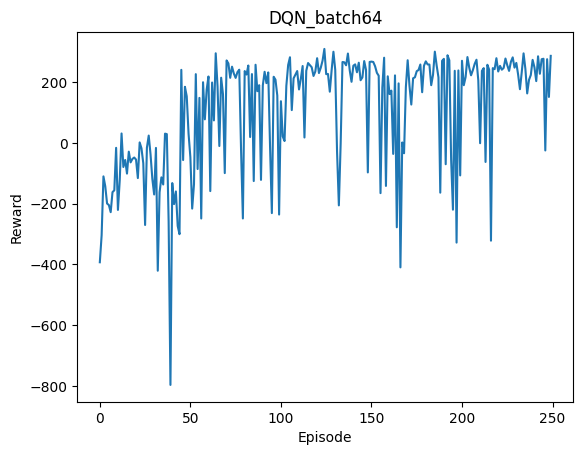

0

In [ ]:
# Training for batch size 64
env = gym.make('LunarLander-v2', render_mode="rgb_array")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 64

agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes+1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN64.zip DQN/")


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 25	Average Reward: -128.29	Epsilon: 0.47
Episode 49	Average Reward: -53.87	Epsilon: 0.22Moviepy - Building video /content/DQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -53.40	Epsilon: 0.22
Episode 75	Average Reward: 107.78	Epsilon: 0.10
Episode 99	Average Reward: 55.52	Epsilon: 0.05Moviepy - Building video /content/DQN/batch128/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 60.54	Epsilon: 0.05
Episode 125	Average Reward: 153.55	Epsilon: 0.02
Episode 149	Average Reward: 193.32	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 193.69	Epsilon: 0.01
Episode 175	Average Reward: 224.94	Epsilon: 0.01
Episode 199	Average Reward: 201.40	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 199.56	Epsilon: 0.01
Episode 225	Average Reward: 198.60	Epsilon: 0.01
Episode 249	Average Reward: 166.77	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 166.83	Epsilon: 0.01


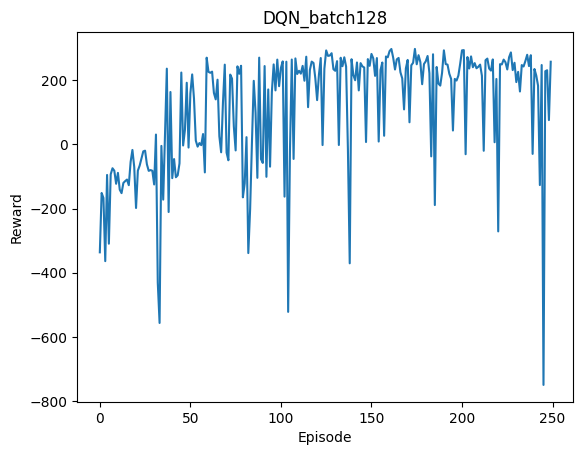

0

In [ ]:
# Training for batch size 128
env = gym.make('LunarLander-v2', render_mode="rgb_array")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 128

agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes+1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN64.zip DQN/")


# DDQN

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 25	Average Reward: -124.98	Epsilon: 0.47
Episode 49	Average Reward: -61.43	Epsilon: 0.22Moviepy - Building video /content/DDQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch64/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -65.99	Epsilon: 0.22
Episode 75	Average Reward: -73.89	Epsilon: 0.10
Episode 99	Average Reward: -39.33	Epsilon: 0.05Moviepy - Building video /content/DDQN/batch64/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch64/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch64/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -57.10	Epsilon: 0.05
Episode 125	Average Reward: -140.02	Epsilon: 0.02
Episode 149	Average Reward: 50.83	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch64/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch64/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch64/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 40.44	Epsilon: 0.01
Episode 175	Average Reward: -71.72	Epsilon: 0.01
Episode 199	Average Reward: 85.94	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch64/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch64/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch64/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 89.74	Epsilon: 0.01
Episode 225	Average Reward: 102.57	Epsilon: 0.01
Episode 249	Average Reward: 169.78	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch64/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch64/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch64/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 164.65	Epsilon: 0.01


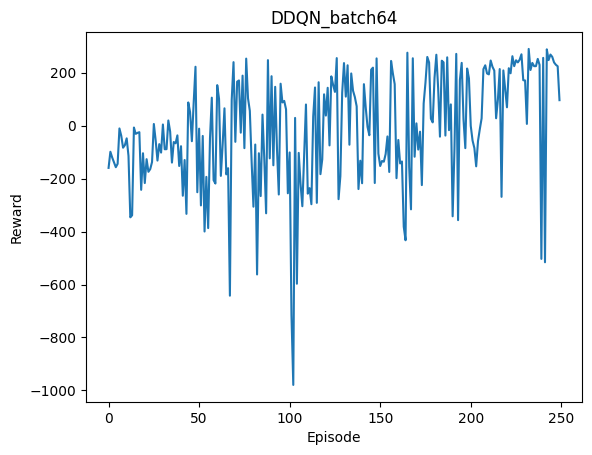

0

In [ ]:
import gym
import io
import os
import glob
import torch
import base64
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.callbacks import EvalCallback
from gym.wrappers import RecordVideo
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import random
from collections import namedtuple, deque
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Set up virtual display
display = Display(visible=0, size=(1400, 900))
display.start()

# Utility function to enable video recording of gym environment and displaying it
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

# Experience Replay class
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

class ExperienceReplay():
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def store_trans(self, s, a, sp, r, done):
        transition = Transition(s, a, sp, r, done)
        self.memory.append(transition)

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Deep Q-Network class
class DeepQNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(DeepQNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(state_size, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, action_size)
        )

    def forward(self, x):
        return self.net(x)

# DDQN Agent class
class DDQNAgent():
    def __init__(self, state_size, action_size, batch_size, gamma=0.99, buffer_size=25000, alpha=1e-4):
        self.state_size = state_size
        self.action_size = action_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.experience_buffer = ExperienceReplay(buffer_size)
        self.value_net = DeepQNetwork(state_size, action_size).to(device)
        self.target_value_net = DeepQNetwork(state_size, action_size).to(device)
        self.update_target_network()
        self.optimizer = optim.Adam(self.value_net.parameters(), lr=alpha)

    def take_action(self, state, eps=0.0):
        self.value_net.eval()
        if random.random() > eps:
            with torch.no_grad():
                return torch.argmax(self.value_net(torch.tensor(state).float().unsqueeze(0).to(device))).item()
        else:
            return np.random.randint(0, self.action_size)

    def update_params(self):
        if len(self.experience_buffer) < self.batch_size:
            return
        batch = Transition(*zip(*self.experience_buffer.sample(self.batch_size)))

        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32).to(device)
        action_batch = torch.tensor(batch.action, dtype=torch.int64).unsqueeze(1).to(device)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32).to(device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
        done_batch = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)

        q_targets_next = self.target_value_net(next_state_batch).detach().max(1)[0].unsqueeze(1)
        q_targets = reward_batch + (self.gamma * q_targets_next * (1 - done_batch))
        q_expected = self.value_net(state_batch).gather(1, action_batch)
        loss = F.mse_loss(q_expected, q_targets)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_network(self):
        self.target_value_net.load_state_dict(self.value_net.state_dict())

    def save(self, fname):
        torch.save(self.value_net.state_dict(), fname)

    def load(self, fname):
        self.value_net.load_state_dict(torch.load(fname, map_location=device))

# Training for batch size 64
env = gym.make('LunarLander-v2', render_mode="rgb_array")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 64

agent = DDQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes+1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DDQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    action_count = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_buffer.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward
        action_count += 1
        if action_count % 5 == 0:
            agent.update_target_network()

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DDQN_batch{BATCH_SIZE}")
plt.savefig(f"DDQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DDQN64.zip DDQN/")


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 25	Average Reward: -102.31	Epsilon: 0.47
Episode 49	Average Reward: -58.77	Epsilon: 0.22

/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DDQN/batch128/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DDQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -63.57	Epsilon: 0.22
Episode 75	Average Reward: 43.50	Epsilon: 0.10
Episode 99	Average Reward: 88.92	Epsilon: 0.05

/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DDQN/batch128/eps100 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DDQN/batch128/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 73.68	Epsilon: 0.05
Episode 125	Average Reward: 34.31	Epsilon: 0.02
Episode 149	Average Reward: 167.49	Epsilon: 0.01

/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DDQN/batch128/eps150 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DDQN/batch128/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 176.85	Epsilon: 0.01
Episode 175	Average Reward: 227.56	Epsilon: 0.01
Episode 199	Average Reward: 250.29	Epsilon: 0.01

/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DDQN/batch128/eps200 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DDQN/batch128/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 250.07	Epsilon: 0.01
Episode 225	Average Reward: 210.78	Epsilon: 0.01
Episode 249	Average Reward: 235.91	Epsilon: 0.01

/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DDQN/batch128/eps250 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DDQN/batch128/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 225.97	Epsilon: 0.01


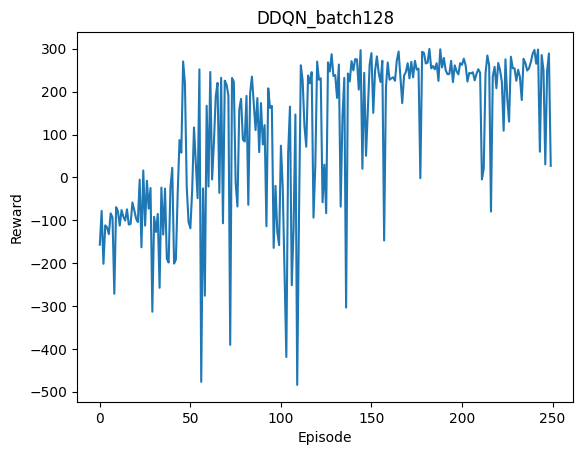

0

In [ ]:
# Training for batch size 128
env = gym.make('LunarLander-v2', render_mode="rgb_array")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 128

agent = DDQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes+1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DDQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    action_count = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_buffer.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward
        action_count += 1
        if action_count % 5 == 0:
            agent.update_target_network()

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DDQN_batch{BATCH_SIZE}")
plt.savefig(f"DDQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DDQN128.zip DDQN/")
